<a href="https://colab.research.google.com/github/EdH66/Colab_notebooks/blob/main/Multi_Label_Classification_PyTorchandResNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multi-image Classification Script with ResNet comparison**

1.   Connect colab notebook to google drive and import test image






In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from PIL import Image


In [4]:
InputImg = Image.open("/content/drive/My Drive/Colab Notebooks/Colab Classification/Data/mouse and cat.jpg")

In [6]:
import matplotlib.pyplot as plt


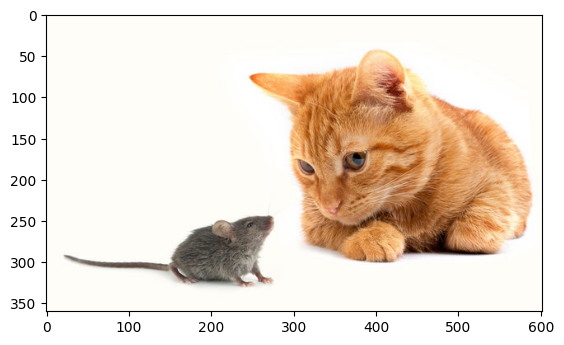

In [7]:
plt.imshow(InputImg)

2. Apply transform and convert to tensor. Now use Pytorch library not PIL ibrary

In [9]:
print(InputImg.size)

(602, 360)


In [8]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])

In [10]:
InputImg_t = transform(InputImg)

In [ ]:
print(InputImg_t.shape)


torch.Size([3, 224, 224])


3. Add batch dimention to single image

In [11]:
import torch
InputImg_bt = torch.unsqueeze(InputImg_t, 0);
print(InputImg_bt .shape)

torch.Size([1, 3, 224, 224])


4. Import pre-trained models from PyTorch

In [ ]:
from torchvision import models
dir(models)

5. Chose prefered model (e.g ResNet18, Resnet101, AlexNex)

In [ ]:
resnet152 = models.resnet152(pretrained=True)
resnet152.eval()
resnet50 = models.resnet50(pretrained=True)
resnet50.eval()

6. Pass the image to the model

In [14]:
output152 = resnet152(InputImg_bt)
output50 = resnet50(InputImg_bt)

7. Read the image net classes into the ImageNet variable

In [15]:
with open("/content/drive/My Drive/Colab Notebooks/Colab Classification/Data/imagenet1000Classes.txt") as classesfile:
  ImageNetclasses = [line.strip() for line in classesfile.readlines()]

8. Find the predicted index of the top scores that occur in the output of the model. Fetch the class name of maximum prediction and print with the probability.

In [19]:
_, predictedLabels = torch.sort(output152, descending=True)
percentage = torch.sigmoid(output152)[0] * 100
[(ImageNetclasses[index], percentage[index].item()) for index in predictedLabels[0][:10]] # Number is decending list of n top scores


[("281: 'tabby, tabby cat',", 99.99172973632812),
 ("282: 'tiger cat',", 99.99012756347656),
 ("285: 'Egyptian cat',", 99.9723129272461),
 ("357: 'mink',", 99.82244110107422),
 ("298: 'mongoose',", 99.80396270751953),
 ("333: 'hamster',", 99.80279541015625),
 ("356: 'weasel',", 99.76910400390625),
 ("674: 'mousetrap',", 99.72803497314453),
 ("508: 'computer keyboard, keypad',", 99.70501708984375),
 ("673: 'mouse, computer mouse',", 99.65232849121094)]

In [20]:
_, predictedLabels = torch.sort(output50, descending=True)
percentage = torch.sigmoid(output50)[0] * 100
[(ImageNetclasses[index], percentage[index].item()) for index in predictedLabels[0][:10]]

[("282: 'tiger cat',", 99.99964141845703),
 ("281: 'tabby, tabby cat',", 99.9996337890625),
 ("285: 'Egyptian cat',", 99.99813842773438),
 ("588: 'hamper',", 99.96511840820312),
 ("620: 'laptop, laptop computer',", 99.94973754882812),
 ("283: 'Persian cat',", 99.93683624267578),
 ("478: 'carton',", 99.93658447265625),
 ("728: 'plastic bag',", 99.93647003173828),
 ("463: 'bucket, pail',", 99.92802429199219),
 ("904: 'window screen',", 99.92015838623047)]